This code loads the sample spatial transcriptomics dataset from the Spatial Transcriptomics website, preprocesses the data, performs clustering using the Leiden algorithm, and visualizes the results using UMAP. The resulting plot shows the different cell types identified by the clustering algorithm.

In [1]:
! pip install scanpy
! pip install anndata
! pip install spatialtis

  Using cached scanpy-1.9.3-py3-none-any.whl (2.0 MB)
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached session_info-1.0.0-py3-none-any.whl
  Using cached anndata-0.9.1-py3-none-any.whl (102 kB)
  Using cached numba-0.56.4-cp310-cp310-macosx_11_0_arm64.whl (2.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 22.8 MB/s eta 0:00:00a 0:00:01
  Using cached natsort-8.3.1-py3-none-any.whl (38 kB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Using cached numpy-1.23.5-cp310-cp310-macosx_11_0_arm64.whl (13.4 MB)
  Using cached llvmlite-0.39.1-cp310-cp310-macosx_11_0_arm64.whl (23.1 MB)
  Using cached pynndescent-0.5.10-py3-none-any.whl
  Using cached stdlib_list-0.8.0-py3-none-any.whl (63 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
  Using cached spatialtis-0.5.0-py3-none-any.whl (58 kB)
  Using cached thefuzz-0.19.0-py2.py3-none-any.whl (17 kB

In [24]:
import scanpy as sc

In [3]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3

adata = sc.datasets.visium_sge(sample_id="V1_Human_Lymph_Node")
adata.var_names_make_unique()
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

-----
anndata     0.9.1
scanpy      1.9.3
-----
PIL                 9.4.0
appnope             0.1.3
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cffi                1.15.1
colorama            0.4.6
comm                0.1.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.6
decorator           5.1.1
defusedxml          0.7.1
executing           1.2.0
google              NA
h5py                3.8.0
hypergeom_ufunc     NA
invgauss_ufunc      NA
ipykernel           6.22.0
ipython_genutils    0.2.0
ipywidgets          8.0.4
jedi                0.18.2
joblib              1.2.0
kiwisolver          1.4.4
llvmlite            0.39.1
matplotlib          3.7.1
mpl_toolkits        NA
natsort             8.3.1
nbinom_ufunc        NA
ncf_ufunc           NA
nct_ufunc           NA
ncx2_ufunc          NA
numba               0.56.4
numpy               1.23.5
packaging           23.0
pandas              

/Users/justin/miniconda3/envs/tensorflow/lib/python3.10/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


/var/folders/db/dkqv3mq12fg2m2pqjzjx0_700000gn/T/ipykernel_23816/1125004840.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
/var/folders/db/dkqv3mq12fg2m2pqjzjx0_700000gn/T/ipykernel_23816/1125004840.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.

<Axes: xlabel='n_genes_by_counts'>

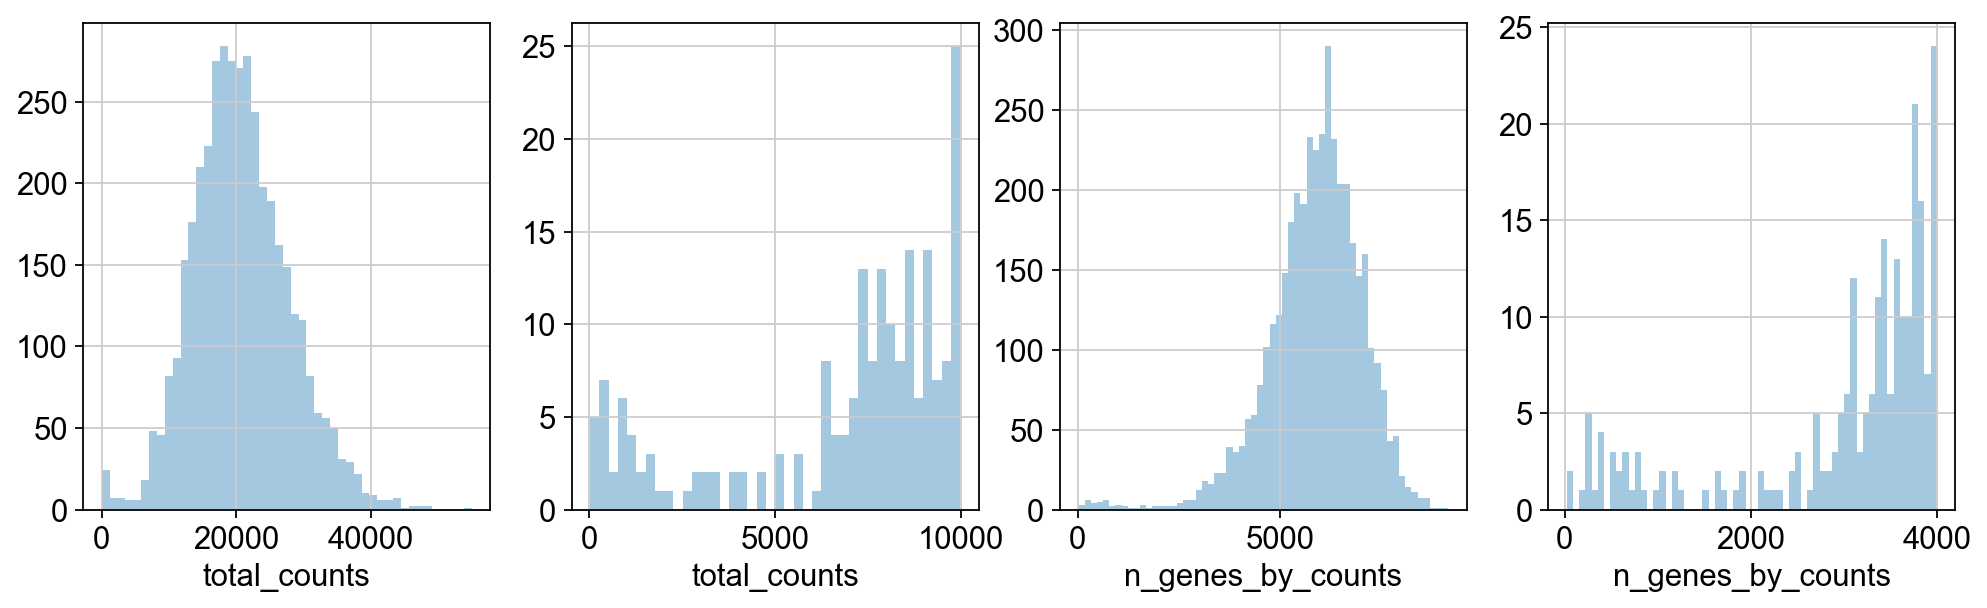

In [4]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

In [7]:
import numpy
sc.pp.filter_cells(adata, min_counts=5000)
sc.pp.filter_cells(adata, max_counts=35000)
adata = adata[adata.obs["pct_counts_mt"] < 20]
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=10)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="clusters")

filtered out 50 cells that have less than 5000 counts
#cells after MT filter: 3811
filtered out 8 genes that are detected in less than 10 cells
normalizing counts per cell
    finished (0:00:00)


/Users/justin/miniconda3/envs/tensorflow/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP


ContextualVersionConflict: (numpy 1.24.2 (/Users/justin/miniconda3/envs/tensorflow/lib/python3.10/site-packages), Requirement.parse('numpy<1.24,>=1.18'), {'numba'})

In [14]:
! pip install numpy